RoBERTa large tests

Linear SVM

In [17]:
from sklearn import svm
clf = svm.LinearSVC(class_weight="balanced", dual=False)
clf.fit(train_x, train_y)
predict_stats(clf, test_x, test_y)

Micro F1-score: 0.875
Macro F1-score: 0.5246917576681712


SVM with RBF kernel

In [18]:
from sklearn import svm
clf = svm.SVC(class_weight="balanced")
clf.fit(train_x, train_y)
predict_stats(clf, test_x, test_y)

Micro F1-score: 0.844
Macro F1-score: 0.5714370190360469


Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight="balanced")
clf.fit(train_x, train_y)
predict_stats(clf, test_x, test_y)

Micro F1-score: 0.866
Macro F1-score: 0.3093962129331904


SciKit Learn MLP

In [20]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(train_x, train_y)
predict_stats(clf, test_x, test_y)

Micro F1-score: 0.89
Macro F1-score: 0.508031233554164


Custom MLP

In [37]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(512, input_shape=(1024,), activation="relu", kernel_initializer="he_normal"))
model.add(Dropout(0.65))
model.add(Dense(64, activation="relu", kernel_initializer="he_normal"))
model.add(Dropout(0.65))
model.add(Dense(3, activation="softmax", kernel_initializer="he_normal"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [39]:
epochs = 5
count = len(train_y)
class_weights = np.sum(train_y_ohe, axis=0)
class_weights = { i : (count - w) / count for i,w in enumerate(class_weights)}

In [40]:
feature = model.fit(
    train_x_np,
    train_y_ohe,
    epochs=epochs,
    batch_size=32,
    class_weight=class_weights,
    verbose=2,
    validation_data=(test_x_np, test_y_ohe)
)

Epoch 1/5
314/314 - 5s - loss: 0.1468 - accuracy: 0.7644 - val_loss: 0.4464 - val_accuracy: 0.7940 - 5s/epoch - 15ms/step
Epoch 2/5
314/314 - 2s - loss: 0.1239 - accuracy: 0.7855 - val_loss: 0.5217 - val_accuracy: 0.7880 - 2s/epoch - 6ms/step
Epoch 3/5
314/314 - 2s - loss: 0.1148 - accuracy: 0.7940 - val_loss: 0.3818 - val_accuracy: 0.8680 - 2s/epoch - 5ms/step
Epoch 4/5
314/314 - 2s - loss: 0.1103 - accuracy: 0.8098 - val_loss: 0.3559 - val_accuracy: 0.8750 - 2s/epoch - 5ms/step
Epoch 5/5
314/314 - 2s - loss: 0.1049 - accuracy: 0.8131 - val_loss: 0.3473 - val_accuracy: 0.8520 - 2s/epoch - 5ms/step


In [41]:
results = pd.DataFrame({
    "training_accuracy": feature.history["accuracy"],
    "training_loss": feature.history["loss"],
    "test_accuracy": feature.history["val_accuracy"],
    "test_loss": feature.history["val_loss"],
    "epoch": list(range(1, epochs + 1))
})
results

,training_accuracy,training_loss,test_accuracy,test_loss,epoch
0,0.764366,0.146797,0.794,0.446438,1
1,0.785480,0.123913,0.788,0.521743,2
2,0.794044,0.114844,0.868,0.381815,3
3,0.809780,0.110274,0.875,0.355889,4
4,0.813066,0.104928,0.852,0.347267,5


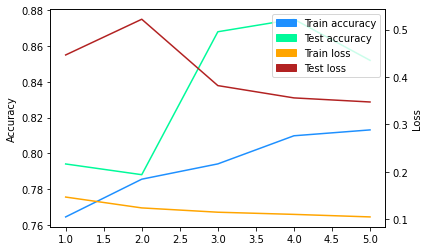

In [42]:
patches = [
    Patch(color='dodgerblue',label='Train accuracy'),
    Patch(color='mediumspringgreen',label='Test accuracy'),
    Patch(color='orange',label='Train loss'),
    Patch(color='firebrick',label='Test loss')
]

fig, ax1 = plt.subplots()

ax1.plot(results["epoch"],results["training_accuracy"],'dodgerblue')
ax1.plot(results["epoch"],results["test_accuracy"],'mediumspringgreen')
ax1.set_ylabel("Accuracy")

ax2 = ax1.twinx()
ax2.plot(results["epoch"],results["training_loss"],'orange')
ax2.plot(results["epoch"],results["test_loss"],'firebrick')
ax2.set_ylabel("Loss")

plt.legend(handles=patches)
plt.show()

In [43]:
predictions = np.argmax(model.predict(test_x_np), axis=1)
y_true = np.argmax(test_y_ohe, axis=1)
stats(y_true, predictions)

Micro F1-score: 0.852
Macro F1-score: 0.5444607902585977
